In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [43]:
data = 'D:\\Placement\\ML_Project\\dataset\\car.csv'
df = pd.read_csv(data, header=None)
print("Dataframe shape : ", df.shape)
df.head()

Dataframe shape :  (1728, 7)


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [44]:
# Renaming of column names 
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [45]:
df.describe()


,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [46]:
df['buying'].value_counts()


buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

In [6]:
# check missing values in variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [7]:
X = df.drop(['class'], axis=1)
y = df['class']

print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (1728, 6)
y shape :  (1728,)


In [8]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (1157, 6)
X_test :  (571, 6)
Y_train :  (1157,)
Y_test :  (571,)


In [9]:
# import category encoders
import category_encoders as ce 
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


In [10]:
X_train.head()


,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


# Random Forest     

In [11]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9457


In [12]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


# Important features with Random Forest Model

In [14]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)


# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

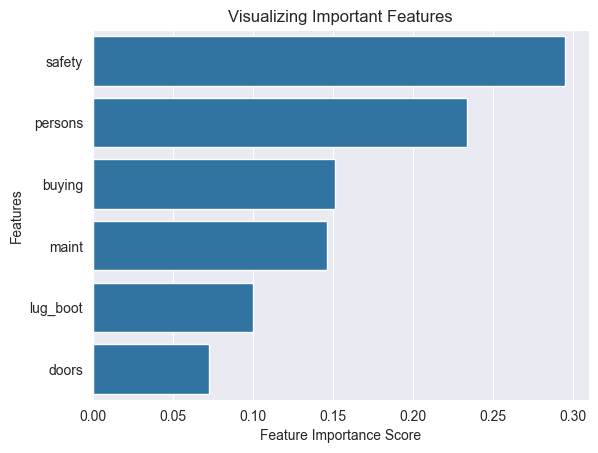

In [15]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

Build Random Forest model on selected features

Now, I will drop the least important feature doors from the model, rebuild the model and check its effect on accuracy.

In [58]:
df.head()
df.drop(['class', 'lug_boot', 'doors'], axis= 1)

,buying,maint,persons,safety
0,vhigh,vhigh,2,low
1,vhigh,vhigh,2,med
2,vhigh,vhigh,2,high
3,vhigh,vhigh,2,low
4,vhigh,vhigh,2,med
...,...,...,...,...
1723,low,low,more,med
1724,low,low,more,high
1725,low,low,more,low
1726,low,low,more,med


In [60]:
# declare feature vector and target variable
X = df.drop(['class', 'doors'], axis= 1)
y = df['class']
print(X.head())

# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)



  buying  maint persons lug_boot safety
0  vhigh  vhigh       2    small    low
1  vhigh  vhigh       2    small    med
2  vhigh  vhigh       2    small   high
3  vhigh  vhigh       2      med    low
4  vhigh  vhigh       2      med    med


In [27]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)


# Check accuracy score 
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with doors variable removed : 0.9264


In [28]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571

